In [117]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [118]:
# Loading the dataset

df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [119]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### The scale and units of these features are vastly different.

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Data Cleaning

In [121]:
# Checking missing data
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [122]:
# rescalling numerical features

scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df[num_vars] = scaler.fit_transform(df[num_vars])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,yes,no,no,no,yes,0.666667,yes,furnished
1,0.909091,0.502405,0.6,1.000000,1.000000,yes,no,no,no,yes,1.000000,no,furnished
2,0.909091,0.571134,0.4,0.333333,0.333333,yes,no,yes,no,no,0.666667,yes,semi-furnished
3,0.906061,0.402062,0.6,0.333333,0.333333,yes,no,yes,no,yes,1.000000,yes,furnished
4,0.836364,0.396564,0.6,0.000000,0.333333,yes,yes,yes,no,yes,0.666667,no,furnished


In [123]:
# Viewing the features after scaling, now they are within 0 to 1

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.261189,0.240587,0.393028,0.095413,0.268502,0.231193
std,0.161943,0.149151,0.147613,0.167490,0.289164,0.287195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145455,0.134021,0.200000,0.000000,0.000000,0.000000
50%,0.224242,0.202749,0.400000,0.000000,0.333333,0.000000
75%,0.345455,0.323711,0.400000,0.333333,0.333333,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [124]:
# Checking the only column that is not binary so see how many unique values that are there

df["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

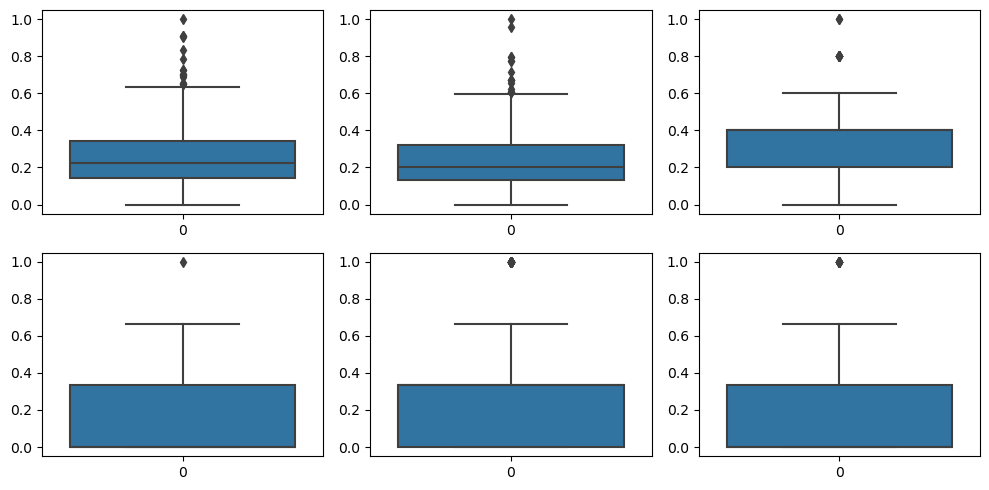

In [100]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

# Price and area have considerable outliers so I will drop the outliers.

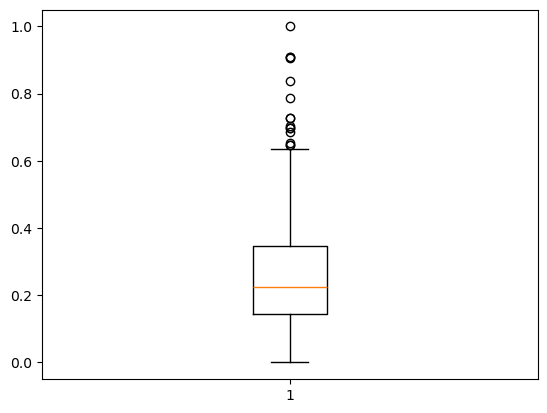

In [101]:
# Outlier Treatment for price
#  Plot a boxplot to visually inspect for outliers in the 'price' data.
plt.boxplot(df.price)

# Calculate the first (Q1) and third quartiles (Q3) of the 'price' data.
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)

# Compute the Interquartile Range (IQR), which is used to define outliers.
IQR = Q3 - Q1

# Filtering the data to remove outliers by keeping only data points that fall within
# 1.5 times the IQR from the Q1 and Q3.
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

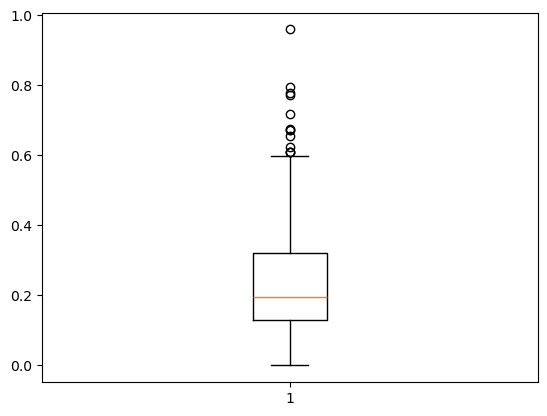

In [102]:
# outlier treatment for area
#  Plot a boxplot to visually inspect for outliers in the 'area' data.
plt.boxplot(df.area)

# Calculate the first (Q1) and third quartiles (Q3) of the 'area' data.
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)

# Compute the Interquartile Range (IQR), which is used to define outliers
IQR = Q3 - Q1

# Filtering the data to remove outliers by keeping only data points that fall within
# 1.5 times the IQR from the Q1 and Q3.
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

# Data preparation

In [104]:
# List of variables that have binary categorical values
cat_var =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df[cat_var] = df[cat_var].apply(binary_map)

In [105]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,0.636364,0.298969,0.6,0.000000,0.333333,1,0,1,0,0,0.666667,0,semi-furnished
16,0.636364,0.340206,0.6,0.333333,0.333333,1,1,1,0,1,0.333333,1,unfurnished
17,0.624242,0.470790,0.4,0.333333,1.000000,1,0,0,0,1,0.666667,0,furnished
18,0.618182,0.202749,0.4,0.333333,0.333333,1,1,0,0,1,0.666667,0,furnished
19,0.615152,0.327835,0.4,0.333333,0.333333,1,0,0,0,1,0.333333,1,semi-furnished


In [106]:
# Splittting the unique label values into 3 features
fstatus = pd.get_dummies(df['furnishingstatus'])
fstatus.head()

,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


In [107]:
# Categorical variable to int
fstatus = fstatus.astype(int)
fstatus.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [108]:
# dropping the furnishingstatus column because it has been splitted into 3 columns
df = df.drop('furnishingstatus', axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
15,0.636364,0.298969,0.6,0.000000,0.333333,1,0,1,0,0,0.666667,0
16,0.636364,0.340206,0.6,0.333333,0.333333,1,1,1,0,1,0.333333,1
17,0.624242,0.470790,0.4,0.333333,1.000000,1,0,0,0,1,0.666667,0
18,0.618182,0.202749,0.4,0.333333,0.333333,1,1,0,0,1,0.666667,0
19,0.615152,0.327835,0.4,0.333333,0.333333,1,0,0,0,1,0.333333,1


In [109]:
# Adding the fstatus to the dataframe
df = pd.concat([df, fstatus], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
15,0.636364,0.298969,0.6,0.000000,0.333333,1,0,1,0,0,0.666667,0,0,1,0
16,0.636364,0.340206,0.6,0.333333,0.333333,1,1,1,0,1,0.333333,1,0,0,1
17,0.624242,0.470790,0.4,0.333333,1.000000,1,0,0,0,1,0.666667,0,1,0,0
18,0.618182,0.202749,0.4,0.333333,0.333333,1,1,0,0,1,0.666667,0,1,0,0
19,0.615152,0.327835,0.4,0.333333,0.333333,1,0,0,0,1,0.333333,1,0,1,0


                    price      area  bedrooms  bathrooms   stories  mainroad  \
price            1.000000  0.533186  0.335328   0.466483  0.446839  0.307185   
area             0.533186  1.000000  0.127745   0.171528  0.109877  0.302116   
bedrooms         0.335328  0.127745  1.000000   0.346230  0.406684 -0.025775   
bathrooms        0.466483  0.171528  0.346230   1.000000  0.311314  0.024614   
stories          0.446839  0.109877  0.406684   0.311314  1.000000  0.120759   
mainroad         0.307185  0.302116 -0.025775   0.024614  0.120759  1.000000   
guestroom        0.303994  0.213826  0.078443   0.152035  0.034301  0.095201   
basement         0.190117  0.042227  0.102261   0.124691 -0.166031  0.041789   
hotwaterheating  0.075979 -0.020489  0.042953   0.046486  0.027834 -0.019471   
airconditioning  0.471706  0.264680  0.150378   0.175634  0.293854  0.102198   
parking          0.321058  0.357276  0.105561   0.127102  0.022043  0.195635   
prefarea         0.280808  0.208014  0.0

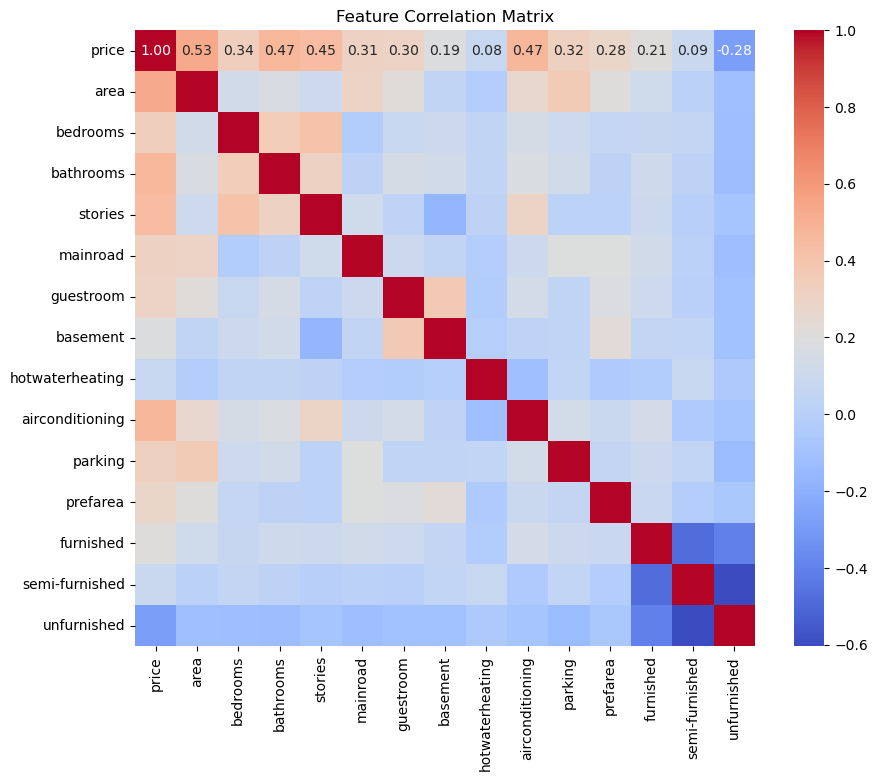

In [114]:
# Correlation matrix to view the relationship between the features
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Matrix')
plt.show()

## I don't understand why this correlation matrix isn't displaying completely.

However, I can see that there is no high correlation to price from other features. It seems only area, bathrooms, stories, and airconditioning that affects price due to their average correlation to price.

# Splitting the Data into Training and Testing Sets

In [84]:
# splitting the features to X variable and the target (price) to y variable
X = df.drop('price', axis=1)
y = df['price']

# splitting the dataset to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [125]:
# Initializing the Linear Regression model.
model = LinearRegression()

# Fitting the Linear Regression model to the training data 
# to learn from the relationship between X_train and y_train.
model.fit(X_train, y_train)

# Using the trained model to make predictions on the test dataset.
y_pred = model.predict(X_test)

In [126]:
y_pred

array([0.30334473, 0.23596191, 0.36669922, 0.33654785, 0.16210938,
       0.44311523, 0.1439209 , 0.21838379, 0.39538574, 0.39782715,
       0.08215332, 0.21606445, 0.11413574, 0.10241699, 0.07299805,
       0.27844238, 0.44287109, 0.21154785, 0.21459961, 0.11950684,
       0.26208496, 0.23449707, 0.21142578, 0.12145996, 0.06530762,
       0.16186523, 0.31323242, 0.20349121, 0.15698242, 0.38525391,
       0.15393066, 0.22546387, 0.40820312, 0.41748047, 0.2310791 ,
       0.38305664, 0.34851074, 0.46606445, 0.09802246, 0.1751709 ,
       0.32568359, 0.4519043 , 0.35925293, 0.29748535, 0.21520996,
       0.15942383, 0.1484375 , 0.14868164, 0.13757324, 0.08947754,
       0.36474609, 0.05993652, 0.27844238, 0.17419434, 0.18835449,
       0.37573242, 0.18432617, 0.33752441, 0.26745605, 0.3815918 ,
       0.25854492, 0.04138184, 0.26538086, 0.24597168, 0.16186523,
       0.24645996, 0.23657227, 0.22619629, 0.17663574, 0.2277832 ,
       0.20983887, 0.18762207, 0.38439941, 0.43359375, 0.15991

In [128]:
# Calculating the R-squared score to evaluate the model's explanatory power on the test data.
r2 = r2_score(y_test, y_pred)

# Computing the Mean Squared Error to quantify the average squared 
# difference between actual and predicted values.
mse = mean_squared_error(y_test, y_pred)

In [129]:
# Printing the result of R-squared and MSE
print("Linear Regression MSE:", mse)
print(f"R-squared: {r2}")

Linear Regression MSE: 0.0074963521002764134
R-squared: 0.6587235256046902


### The linear regression model demonstrates a Mean Squared Error (MSE) of 0.0075, indicating a close fit to the data with minimal average squared errors. The R-squared value of 0.6587 suggests that the model explains approximately 65.87% of the variance in the dependent variable, highlighting a moderate fit where the model captures a significant portion of the data's variability.

Text(0, 0.5, 'y_pred')

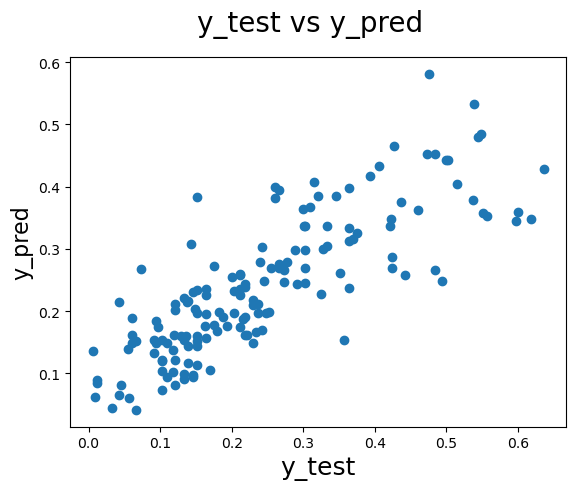

In [91]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          